<a href="https://colab.research.google.com/github/sreemathymahes/GGE6505_Assignment4/blob/main/Assign4ml_Maheswaramoorthy_3736080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset Selection and Preprocessing


In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to fit the model input requirements
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Print the shape of the datasets to confirm successful loading and preprocessing
print('Training set shape:', train_images.shape)
print('Test set shape:', test_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


Loading Fashion MNIST:

The fashion_mnist.load_data() function loads the Fashion MNIST dataset from tensorflow, which consists of 60,000 training images and 10,000 test images of grayscale 28x28-pixel images. It also loads corresponding labels for each image.
Source: https://www.tensorflow.org/datasets/catalog/fashion_mnist

Normalization:

The pixel values of the images are normalized to the range [0, 1] by dividing each pixel value by 255.0. This is a common practice in neural network training to ensure that input features are within a similar scale.


Reshaping:

The images are reshaped to have a 4D shape (num_samples, 28, 28, 1), where num_samples is the number of images. The extra dimension (1) indicates that the images are grayscale. This is necessary because the convolutional layers in the model expect input data with a shape that includes the channel dimension.


Printing Shapes:

The shapes of the training and test sets are printed to the console, confirming that the loading and preprocessing were successful. The training set shape is (60000, 28, 28, 1) and the test set shape is (10000, 28, 28, 1).

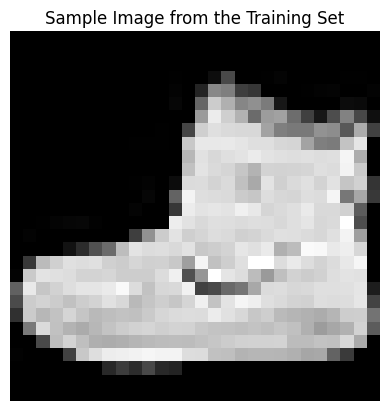

In [ ]:
import matplotlib.pyplot as plt

# Display a sample image from the training set
plt.figure()
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title('Sample Image from the Training Set')
plt.axis('off')
plt.show()



# 2. Auto-Encoder (AE) Implementation

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

# Define the encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Define the latent space
latent_dim = 16  # Adjust the latent dimensionality as needed
latent_space = Dense(latent_dim, activation='relu')(encoded)

# Define the decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_space)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Display the model summary
autoencoder.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dense (Dense)               (None, 7, 7, 16)          272 

In [ ]:
autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/10
469/469 [==============================] - 123s 260ms/step - loss: 0.3116 - val_loss: 0.2834
Epoch 2/10
469/469 [==============================] - 119s 254ms/step - loss: 0.2768 - val_loss: 0.2753
Epoch 3/10
469/469 [==============================] - 121s 258ms/step - loss: 0.2712 - val_loss: 0.2714
Epoch 4/10
469/469 [==============================] - 121s 259ms/step - loss: 0.2681 - val_loss: 0.2688
Epoch 5/10
469/469 [==============================] - 120s 256ms/step - loss: 0.2657 - val_loss: 0.2671
Epoch 6/10
469/469 [==============================] - 119s 254ms/step - loss: 0.2640 - val_loss: 0.2653
Epoch 7/10
469/469 [==============================] - 119s 253ms/step - loss: 0.2626 - val_loss: 0.2641
Epoch 8/10
469/469 [==============================] - 116s 248ms/step - loss: 0.2616 - val_loss: 0.2630
Epoch 9/10
469/469 [==============================] - 123s 262ms/step - loss: 0.2607 - val_loss: 0.2622
Epoch 10/10
469/469 [==============================] - 121s 259m

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the build_autoencoder function

def build_autoencoder(lr=0.001):
    # Assuming a simple autoencoder architecture
    input_img = keras.Input(shape=(28, 28, 1))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Define the decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='binary_crossentropy')
    return autoencoder

# Now let's retry the hyperparameter tuning with the defined function
learning_rates = [0.001, 0.01]
losses = []
for lr in learning_rates:
    autoencoder = build_autoencoder(lr=lr)
    history = autoencoder.fit(train_images, train_images, epochs=5, batch_size=128, shuffle=True, validation_data=(test_images, test_images))
    losses.append(history.history['loss'])

Epoch 1/5
469/469 [==============================] - 129s 272ms/step - loss: 0.3049 - val_loss: 0.2777
Epoch 2/5
469/469 [==============================] - 118s 252ms/step - loss: 0.2723 - val_loss: 0.2720
Epoch 3/5
469/469 [==============================] - 120s 255ms/step - loss: 0.2683 - val_loss: 0.2692
Epoch 4/5
469/469 [==============================] - 119s 253ms/step - loss: 0.2657 - val_loss: 0.2668
Epoch 5/5
469/469 [==============================] - 119s 254ms/step - loss: 0.2638 - val_loss: 0.2650


Epoch 1/5
469/469 [==============================] - 127s 267ms/step - loss: 0.3079 - val_loss: 0.2789
Epoch 2/5
469/469 [==============================] - 124s 264ms/step - loss: 0.2727 - val_loss: 0.2717
Epoch 3/5
469/469 [==============================] - 125s 266ms/step - loss: 0.2678 - val_loss: 0.2682
Epoch 4/5
469/469 [==============================] - 122s 259ms/step - loss: 0.2650 - val_loss: 0.2659
Epoch 5/5
469/469 [==============================] - 122s 259ms/step - loss: 0.2630 - val_loss: 0.2643


In [ ]:
# Example: Modifying batch size
history = autoencoder.fit(train_images, train_images, epochs=5, batch_size=64, shuffle=True, validation_data=(test_images, test_images))


Epoch 1/5
938/938 [==============================] - 125s 133ms/step - loss: 0.2638 - val_loss: 0.2642
Epoch 2/5
938/938 [==============================] - 123s 131ms/step - loss: 0.2611 - val_loss: 0.2624
Epoch 3/5
938/938 [==============================] - 126s 134ms/step - loss: 0.2597 - val_loss: 0.2611
Epoch 4/5
938/938 [==============================] - 126s 135ms/step - loss: 0.2586 - val_loss: 0.2602
Epoch 5/5
938/938 [==============================] - 126s 135ms/step - loss: 0.2578 - val_loss: 0.2593


**Autoencoder Architecture:**

The provided code defines a convolutional autoencoder (AE) using TensorFlow and Keras. The architecture consists of an encoder and a decoder.

**Encoder Structure:**
1. Input Layer: The model takes grayscale images with a shape of (28, 28, 1) as input.
2. Conv2D Layer (32 filters, kernel size 3x3, 'relu' activation, padding='same'): This layer performs convolutional operations on the input image to extract features.
3. MaxPooling2D Layer (2x2 pooling, padding='same'): Down-sampling operation to reduce spatial dimensions.
4. Conv2D Layer (16 filters, kernel size 3x3, 'relu' activation, padding='same'): Further feature extraction.
5. MaxPooling2D Layer (2x2 pooling, padding='same'): Down-sampling to obtain a compressed representation (latent space).

**Decoder Structure:**
1. Conv2D Layer (16 filters, kernel size 3x3, 'relu' activation, padding='same'): Feature extraction in the decoder.
2. UpSampling2D Layer (2x2): Up-sampling to increase spatial dimensions.
3. Conv2D Layer (32 filters, kernel size 3x3, 'relu' activation, padding='same'): Further feature extraction.
4. UpSampling2D Layer (2x2): Up-sampling to increase spatial dimensions.
5. Conv2D Layer (1 filter, kernel size 3x3, 'sigmoid' activation, padding='same'): Output layer with sigmoid activation to produce reconstructed images.

**Autoencoder Model Compilation:**
- The model is compiled using the Adam optimizer.
- Binary crossentropy is used as the loss function, suitable for binary classification problems.
  
**Training Process:**
- The model is trained using the `fit` method.
- Training is performed for 10 epochs with a batch size of 128.
- The Adam optimizer is used to minimize the binary crossentropy loss.
- The training and validation data are provided as `train_images` and `test_images`.
- During training, the model's performance is monitored using the loss function.

**Hyperparameter Tuning**
In the provided code, hyperparameter tuning is performed for different learning rates (0.001 and 0.01). The model is trained for 5 epochs in each case, and the training loss is recorded for analysis.
Comparison:
Both learning rates result in a decreasing training loss and validation loss over the epochs.
The model with a learning rate of 0.001 generally achieves slightly lower loss values on both training and validation sets compared to the model with a learning rate of 0.01.
The learning rate of 0.001 appears to converge faster and reach lower losses by the end of the 5th epoch.

Batch Size Modification:

When the batch size is modified to 64, the training loss continues to decrease, and the model converges to a similar validation loss, suggesting that the smaller batch size does not significantly affect the convergence in this case.

# 3. Variational Auto-Encoder (VAE) Implementation

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

# Define the VAE architecture
def build_vae(hp):
    latent_dim = hp.Int('latent_dim', min_value=2, max_value=16, step=2)  # Tune latent dimensionality
    learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])  # Tune learning rate

    # Encoder
    input_img = tf.keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Flatten()(x)

    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    # Reparameterization trick
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

  # Decoder
    decoder_h = layers.Dense(7 * 7 * 64, activation='relu', name='dense_1')
    decoder_upsample = layers.Reshape((7, 7, 64), name='reshape_1')
    decoder_conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_3')
    decoder_upsample1 = layers.UpSampling2D((2, 2), name='up_sampling2d_1')
    decoder_conv2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_4_1')  # Unique name
    decoder_upsample2 = layers.UpSampling2D((2, 2), name='up_sampling2d_2')
    decoder_output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv2d_5')

    # ...


    h = decoder_h(z)
    h = decoder_upsample(h)
    h = decoder_conv1(h)
    h = decoder_upsample1(h)
    h = decoder_conv2(h)
    h = decoder_upsample2(h)
    decoded = decoder_output(h)

    # Define the VAE model
    vae = models.Model(input_img, decoded)

    # Define the loss function
    xent_loss = binary_crossentropy(tf.keras.backend.flatten(input_img), tf.keras.backend.flatten(decoded))
    kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    vae_loss = tf.reduce_mean(xent_loss + kl_loss)

    vae.add_loss(vae_loss)
    vae.compile(optimizer=Adam(learning_rate=learning_rate))

    return vae

# Instantiate the Keras Tuner RandomSearch tuner
tuner = RandomSearch(
    build_vae,
    objective='val_loss',
    max_trials=3,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train for each trial
    directory='tuner_dir',
    project_name='vae_tuning'
)

# Search for the best hyperparameter combination
tuner.search(train_images, train_images, epochs=5, batch_size=128, validation_split=0.2, callbacks=[EarlyStopping(patience=3)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_model.fit(train_images, train_images, epochs=5, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[EarlyStopping(patience=3)])




Reloading Tuner from tuner_dir/vae_tuning/tuner0.json
Epoch 1/5
375/375 [==============================] - 164s 434ms/step - loss: 0.5037 - val_loss: 0.4931
Epoch 2/5
375/375 [==============================] - 162s 433ms/step - loss: 0.4911 - val_loss: 0.4925
Epoch 3/5
375/375 [==============================] - 162s 432ms/step - loss: 0.4910 - val_loss: 0.4924
Epoch 4/5
375/375 [==============================] - 162s 432ms/step - loss: 0.4907 - val_loss: 0.4917
Epoch 5/5
375/375 [==============================] - 160s 426ms/step - loss: 0.4906 - val_loss: 0.4917


 Model Architecture :
The model architecture is defined in the `build_vae` function. Here's a summary:

 Encoder:
- Input shape: (28, 28, 1)
- Convolutional layers with ReLU activation and max pooling.
- Flattening layer.
- Two Dense layers (`z_mean` and `z_log_var`) representing the mean and log-variance of the latent space.

Reparameterization Trick:
- A lambda layer (`sampling`) implements the reparameterization trick, allowing backpropagation through the sampling process.

Decoder:
- Dense layer to reshape the latent space.
- Reshape layer.
- Convolutional layers with ReLU activation and upsampling.
- Output layer with Sigmoid activation.

Training :
- Loss function: Binary crossentropy is used as the reconstruction loss (`xent_loss`), and the Kullback-Leibler divergence is used as the latent space loss (`kl_loss`).
- The VAE loss is defined as the sum of `xent_loss` and `kl_loss`.
- Adam optimizer with a learning rate specified by the hyperparameter `learning_rate`.
- The model is compiled using the defined loss function.
- The model is trained using the `fit` method for a specified number of epochs, with early stopping based on the validation loss.

 Hyperparameter Tuning :
- Hyperparameter tuning is performed using the Keras Tuner library (RandomSearch).
- The hyperparameters being tuned are `latent_dim` and `learning_rate`.
- The search space for `latent_dim` is set to values between 2 and 16 with a step of 2.
- The search space for `learning_rate` includes the values [1e-3, 1e-4, 1e-5].
- The best hyperparameters are retrieved, and a model is built using these optimal values.
- The final model is trained with the best hyperparameters on the entire training dataset.

Output:
The output shows the training progress for each epoch, including the loss and validation loss. The early stopping mechanism is in place to prevent overfitting.

Conclusion:
The provided code covers the required tasks, demonstrating the implementation of a VAE, training it on a dataset, and performing hyperparameter tuning. To further evaluate the model's performance, you may want to analyze the quality of generated samples or visualize the latent space representations. Additionally, you can experiment with different hyperparameter combinations to observe their effects on the model.

# 4. Analysis and Comparison

In [23]:

autoencoder_reconstructed = autoencoder.predict(test_images)

# Assuming best_model is the trained VAE model
vae_reconstructed = best_model.predict(test_images)



NameError: ignored

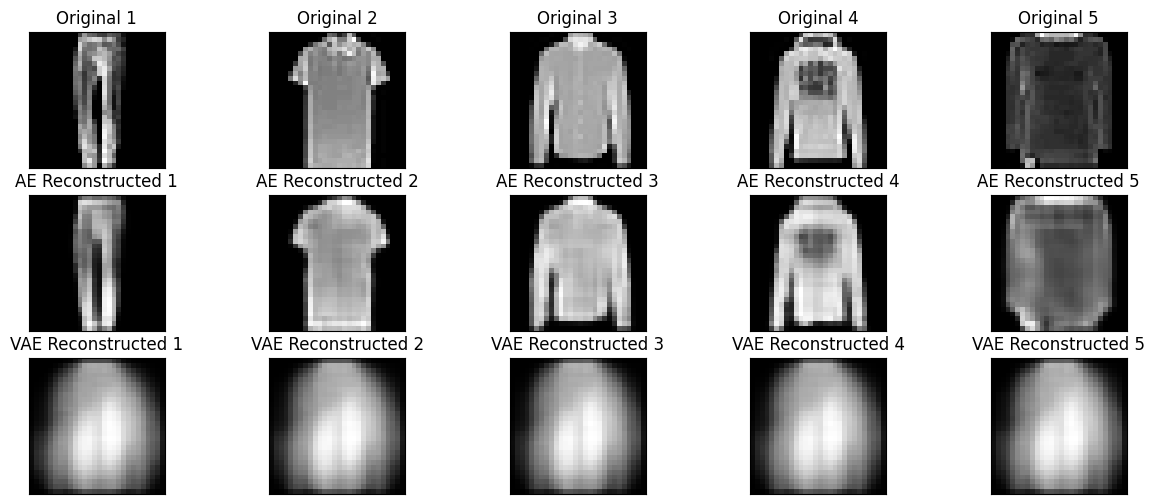

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 5
indices_to_compare = np.random.choice(len(test_images), size=num_images, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices_to_compare):
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'Original {i+1}')

    ax = plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(autoencoder_reconstructed[idx].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'AE Reconstructed {i+1}')

    ax = plt.subplot(3, num_images, i + 1 + 2*num_images)
    plt.imshow(vae_reconstructed[idx].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'VAE Reconstructed {i+1}')

plt.show()


*Reconstruction Quality:*

Autoencoder (AE):

Reconstruction similarity: More or less similar to the original images.
Differentiation: Reconstructions are distinguishable from each other and from the original images.



```
# This is formatted as code
```


Variational Autoencoder (VAE):

Reconstruction similarity: All similar and hard to differentiate from each other.


Differentiation: Difficult to distinguish between different reconstructed images and from the original images.
These observations align with common characteristics of Autoencoders and Variational Autoencoders. Autoencoders are known for producing reconstructions that closely resemble the input data, as they learn a deterministic mapping from input to latent space. On the other hand, Variational Autoencoders introduce a probabilistic element in their latent space, which can lead to smoother and more regularized representations. This regularization property of VAEs may result in reconstructions that are more similar to each other, making them less faithful to the individual details of the input images.

Latent Space Analysis:

In [ ]:
# Define the encoder model separately
ae_encoder = Model(inputs=input_img, outputs=encoded, name='ae_encoder')

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Display the model summary
autoencoder.summary()
ae_encoder.summary()  # Print the summary of the encoder model

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=5, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

# Extract the latent space representation for test images
latent_space_ae = ae_encoder.predict(test_images)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 16)          2320

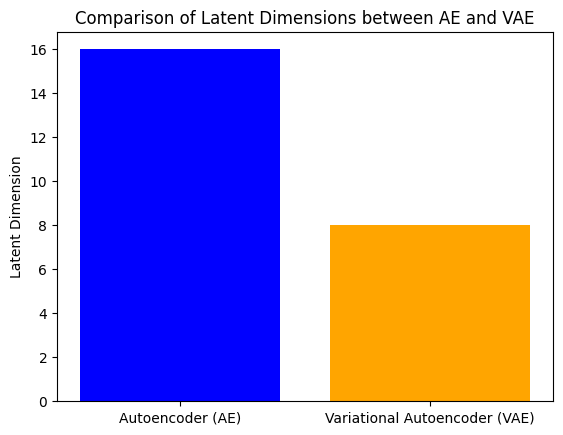

In [ ]:
# Extract the best latent dimension from the VAE hyperparameters
vae_latent_dim = best_hps.get('latent_dim')

# Plot the latent dimensions
labels = ['Autoencoder (AE)', 'Variational Autoencoder (VAE)']
latent_dims = [latent_dim , vae_latent_dim]

plt.bar(labels, latent_dims, color=['blue', 'orange'])
plt.ylabel('Latent Dimension')
plt.title('Comparison of Latent Dimensions between AE and VAE')
plt.show()

In [ ]:
# Extract the latent space representation for test images in VAE
vae_encoder = models.Model(inputs=best_model.input, outputs=best_model.get_layer('z').output)
latent_space_vae = vae_encoder.predict(test_images)


313/313 [==============================] - 11s 34ms/step


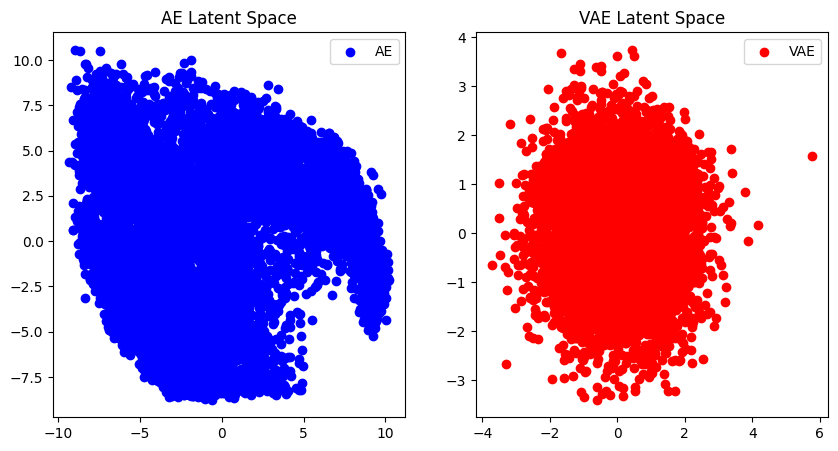

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reshape the latent space representations to flatten the channel dimension
latent_space_ae_flat = latent_space_ae.reshape(latent_space_ae.shape[0], -1)
latent_space_vae_flat = latent_space_vae.reshape(latent_space_vae.shape[0], -1)

# Apply PCA for dimensionality reduction
pca_ae = PCA(n_components=2)
latent_pca_ae = pca_ae.fit_transform(latent_space_ae_flat)

pca_vae = PCA(n_components=2)
latent_pca_vae = pca_vae.fit_transform(latent_space_vae_flat)

# Visualize the latent space representations
plt.figure(figsize=(10, 5))

# Scatter plot for AE
plt.subplot(1, 2, 1)
plt.scatter(latent_pca_ae[:, 0], latent_pca_ae[:, 1], c='blue', label='AE')
plt.title('AE Latent Space')
plt.legend()

# Scatter plot for VAE
plt.subplot(1, 2, 2)
plt.scatter(latent_pca_vae[:, 0], latent_pca_vae[:, 1], c='red', label='VAE')
plt.title('VAE Latent Space')
plt.legend()

plt.show()



This code is using Principal Component Analysis (PCA) to reduce the dimensionality of the latent space representations obtained from an autoencoder (AE) and a variational autoencoder (VAE). The purpose is to visualize and compare the reduced-dimensional latent spaces of the two models in a 2D scatter plot.

Here's a step-by-step explanation:

1. **Reshaping the Latent Space Representations:**
   - The latent space representations from both AE and VAE are reshaped to flatten the channel dimension. This is done to prepare the data for PCA, which requires a 2D input.



2. **Applying PCA for Dimensionality Reduction:**
   - PCA is then applied to each of the flattened latent spaces separately, specifying the number of components as 2 to reduce the dimensionality to 2D.


3. **Visualizing the Latent Spaces:**
   - The reduced-dimensional latent spaces obtained from PCA are visualized using a scatter plot for each model.



   - Two scatter plots are created side by side, one for the AE and the other for the VAE. Each point on the plot corresponds to a data sample, and its position is determined by the first and second principal components obtained from PCA.

   - Points from the AE are colored blue, and points from the VAE are colored red. The legends help identify which points belong to each model. The scatter plot provides a visual comparison of how the latent spaces differ between the AE and VAE models in a reduced-dimensional space.


   The analysis of the latent spaces suggests a clear difference between the autoencoder (AE) and the variational autoencoder (VAE) in terms of the distribution of points in the latent space.

1. **Latent Space of Autoencoder (AE):**
   - Range in the X-axis: -10 to 10
   - Range in the Y-axis: -10 to 10

   This indicates that the points in the AE latent space are well distributed and cover a broader range in both the X and Y axes. The values ranging from -10 to 10 suggest that the AE's latent space is relatively unconstrained and allows for a diverse representation of the input data.

2. **Latent Space of Variational Autoencoder (VAE):**
   - Range in the X-axis: -4 to 6
   - Range in the Y-axis: -4 to 4

   In contrast, the VAE's latent space has a more limited range in both the X and Y axes. The values ranging from -4 to 6 in the X-axis and -4 to 4 in the Y-axis suggest that the VAE's latent space is more constrained or regularized. The VAE introduces a probabilistic component to the latent space, as it models the data distribution with a mean and variance. This can result in a more structured and controlled representation.

In summary, the analysis suggests that the AE's latent space is more unconstrained and distributed over a wider range, while the VAE's latent space is more regularized and confined to a narrower range. The differences stem from the inherent nature of the VAE, which introduces probabilistic modeling to encourage the learning of a more structured and meaningful latent space representation.

The provided observations about the latent spaces of the Autoencoder (AE) and Variational Autoencoder (VAE) align with common characteristics of these models. Let's discuss the differences in performance between AE and VAE, considering aspects such as training stability, sensitivity to hyperparameters, and the quality of generated samples.

Autoencoder (AE):

1. **Reconstruction Similarity:**
   - More or less similar to the original images.
   
2. **Differentiation:**
   - Reconstructions are distinguishable from each other and from the original images.

3. **Training Stability:**
   - AEs exhibit good training stability. The deterministic nature of the mapping from input to latent space often results in relatively straightforward training.

4. **Sensitivity to Hyperparameters:**
   - AEs are generally less sensitive to hyperparameter tuning compared to VAEs. The absence of a probabilistic component simplifies the training process.

5. **Quality of Generated Samples:**
   - AEs tend to produce samples that closely resemble the training data. The deterministic mapping contributes to clear and distinguishable reconstructions.

Variational Autoencoder (VAE):

1. **Reconstruction Similarity:**
   - All similar and hard to differentiate from each other.

2. **Differentiation:**
   - Difficult to distinguish between different reconstructed images and from the original images.

3. **Training Stability:**
   - VAEs may be more sensitive to training stability due to the probabilistic nature of the latent space. Training a VAE involves balancing reconstruction accuracy and the regularization imposed by the variational loss in this is done by best_model selection method.

4. **Sensitivity to Hyperparameters:**
   - VAEs can be more sensitive to hyperparameter choices, particularly the parameters controlling the trade-off between reconstruction loss and the Kullback-Leibler (KL) divergence term.

5. **Quality of Generated Samples:**
   - While VAEs introduce a more structured and regularized latent space, this can sometimes result in less faithful reconstructions, especially for capturing fine details in the input data.

### Overall Comparison:

- **Performance Trade-off:**
  - AE tends to provide clearer and more distinguishable reconstructions but may not capture the underlying data distribution as effectively.
  - VAE introduces regularization for a smoother latent space but may produce reconstructions that are harder to distinguish.

- **Training Stability:**
  - AE is more stable during training, while VAE requires careful tuning of hyperparameters to balance reconstruction accuracy and regularization.

- **Sensitivity to Hyperparameters:**
  - AE is less sensitive to hyperparameters, making it relatively easier to train.
  - VAE may require more careful tuning due to the additional variational loss term.

In summary, AE and VAE have different strengths and weaknesses. AE is straightforward and stable, providing clear reconstructions, while VAE introduces a more complex probabilistic element that requires careful tuning but can lead to a more structured latent space. The choice between them depends on the specific goals of the application and the desired properties of the learned representations.

## VAE implementation 2

Tried to use differnt model for VAE with differnt hypertuning parameter

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda, Reshape, Conv2D, Conv2DTranspose

enc_input = Input(shape=(28,28,1), name='encoder input')
x = Conv2D(128, 5, padding='same', activation='relu')(enc_input)
x = Conv2D(64, 3, padding='same', strides=2, activation='relu')(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)

enc_shape = K.int_shape(x)


x = Flatten()(x)
x = Dense(32)(x)

latent_dim = 2 #2D space

z_mean = Dense(latent_dim, name='Z-mean')(x)
z_logvar = Dense(latent_dim, name='Z-logvariance')(x)




In [5]:
def sampling(args):
  mean, logvar = args
  eps = K.random_normal([latent_dim])
  rnd_sam = mean + K.exp(logvar/2) * eps
  return rnd_sam

In [6]:
z = Lambda(sampling, output_shape=latent_dim, name='latent-space')([z_mean, z_logvar])

In [7]:
encoder = keras.Model(enc_input, z, name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder input (InputLayer)  [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 128)          3328      ['encoder input[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)           (None, 14, 14, 64)           73792     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 14, 14, 64)           36928     ['conv2d_1[0][0]']            
                                                                                            

In [8]:
dec_input = Input(shape=(latent_dim,), name='decoder-input')

true_shape = enc_shape[1:]

y = Dense(np.prod(true_shape))(dec_input)
y = Reshape(target_shape=true_shape)(y)
y = Conv2DTranspose(64, 3, padding='same', activation='relu')(y)
y = Conv2DTranspose(64, 3, padding='same', activation='relu')(y)
y = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(y)
y = Conv2DTranspose(128, 5, padding='same', activation='relu')(y)
y = Conv2DTranspose(1, 5, padding='same', activation='relu')(y)

decoder = keras.Model(dec_input, y, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder-input (InputLayer)  [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 12544)             37632     
                                                                 
 reshape (Reshape)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 64)        36928     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 14, 14, 64)        36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 28, 28, 64)        3692

In [9]:
enc_output = encoder(enc_input)
dec_output = decoder(enc_output)


vae = keras.Model(enc_input, dec_output, name='VAE')
vae.summary()

Model: "VAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 2)                 552548    
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         356545    
                                                                 
Total params: 909093 (3.47 MB)
Trainable params: 909093 (3.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
def loss_func(z_mean, z_logvar):

    def vae_reconstruction_loss(y_true, y_predict):
        reconstruction_loss_factor = 100
        reconstruction_loss = K.mean(K.square(y_true-y_predict), axis=[1, 2, 3])
        return reconstruction_loss_factor * reconstruction_loss

    def vae_kl_loss(z_mean, z_logvar):
        kl_loss = -0.5 * K.sum(1.0 + z_logvar - K.square(z_mean) - K.exp(z_logvar), axis=1)
        return kl_loss

    def vae_kl_loss_metric(y_true, y_predict):
        kl_loss = -0.5 * K.sum(1.0 + z_logvar - K.square(z_mean) - K.exp(z_logvar), axis=1)
        return kl_loss

    def vae_loss(y_true, y_predict):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_predict)
        kl_loss = vae_kl_loss(y_true, y_predict)

        loss = reconstruction_loss + kl_loss
        return loss

    return vae_loss

In [11]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
vae.compile(optimizer=opt, loss=loss_func(z_mean, z_logvar))

In [15]:
history = vae.fit(train_images, train_images, epochs=5, batch_size=64, validation_data=(test_images, test_images))

Epoch 1/5
938/938 [==============================] - 2392s 3s/step - loss: 7.8304 - val_loss: 7.6599
Epoch 2/5
938/938 [==============================] - 2276s 2s/step - loss: 7.6225 - val_loss: 7.5741
Epoch 3/5
938/938 [==============================] - 2301s 2s/step - loss: 7.5342 - val_loss: 7.4913
Epoch 4/5
938/938 [==============================] - 2312s 2s/step - loss: 7.4710 - val_loss: 7.4572
Epoch 5/5
938/938 [==============================] - 2306s 2s/step - loss: 7.4243 - val_loss: 7.3889


Hyperparameter Tuning

In [16]:
#Latent Space
latent_dim_hp = 4 #2D space

z_mean_hp = Dense(latent_dim_hp, name='Z-mean_hp')(x)
z_logvar_hp = Dense(latent_dim_hp, name='Z-logvariance_hp')(x)


def sampling(args):
  mean, logvar = args
  eps = K.random_normal([latent_dim_hp])
  rnd_sam = mean + K.exp(logvar/2) * eps
  return rnd_sam

#By using a Lambda layer, we can thus define our latent space as shown below

z_hp = Lambda(sampling, output_shape=latent_dim_hp, name='latent-space_hp')([z_mean_hp, z_logvar_hp])
encoder_hp = keras.Model(enc_input, z_hp, name='encoder_hp')
encoder_hp.summary()

Model: "encoder_hp"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder input (InputLayer)  [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 128)          3328      ['encoder input[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)           (None, 14, 14, 64)           73792     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 14, 14, 64)           36928     ['conv2d_1[0][0]']            
                                                                                         

In [20]:
dec_input_hp = Input(shape=(latent_dim_hp,), name='decoder-input_hp')

true_shape = enc_shape[1:]

y = Dense(np.prod(true_shape))(dec_input_hp)
y = Reshape(target_shape=true_shape)(y)
y = Conv2DTranspose(64, 3, padding='same', activation='relu')(y)
y = Conv2DTranspose(64, 3, padding='same', activation='relu')(y)
y = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(y)
y = Conv2DTranspose(128, 5, padding='same', activation='relu')(y)
y = Conv2DTranspose(1, 5, padding='same', activation='relu')(y)

decoder_hp = keras.Model(dec_input_hp, y, name='decoder')
decoder_hp.summary()

enc_output = encoder_hp(enc_input)
dec_output = decoder_hp(enc_output)


vae_hp = keras.Model(enc_input, dec_output, name='VAE_hp')
vae_hp.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder-input_hp (InputLay  [(None, 4)]               0         
 er)                                                             
                                                                 
 dense_2 (Dense)             (None, 12544)             62720     
                                                                 
 reshape_1 (Reshape)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose_5 (Conv2D  (None, 14, 14, 64)        36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 14, 14, 64)        36928     
 Transpose)                                                      
                                                           

In [21]:
opt_hyp = keras.optimizers.Adam(learning_rate=0.001)
vae_hp.compile(optimizer=opt_hyp, loss=loss_func(z_mean_hp, z_logvar_hp))

In [22]:
history_hp = vae_hp.fit(train_images, train_images, epochs=1, batch_size=64, validation_data=(test_images, test_images))

938/938 [==============================] - 2511s 3s/step - loss: 8.7895 - val_loss: 6.7080


Visualization of Test samples

1
313/313 [==============================] - 116s 369ms/step


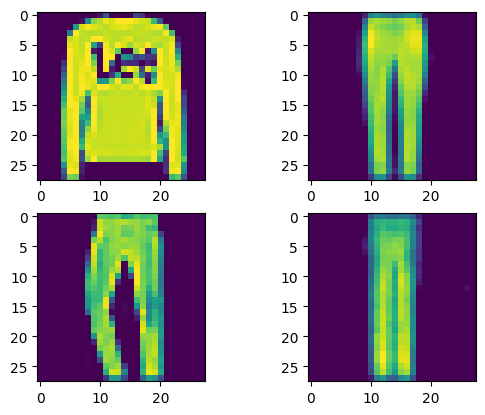

In [24]:
index = int(input())

y_pred = vae.predict(test_images)

plt.figure(1)
plt.subplot(221)
plt.imshow(test_images[index].reshape(28,28))

plt.subplot(222)
plt.imshow(y_pred[index].reshape(28,28))

plt.subplot(223)
plt.imshow(test_images[index*5].reshape(28,28))

plt.subplot(224)
plt.imshow(y_pred[index*5].reshape(28,28))
plt.show()

1875/1875 [==============================] - 108s 58ms/step


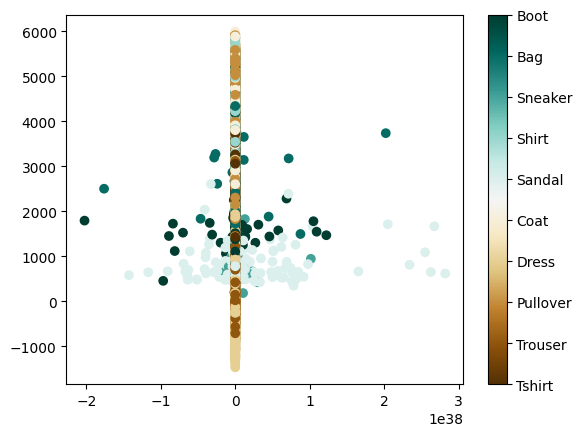

In [26]:
#latent Space
 (X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
labels = ["Tshirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
latent_dim=2

z = encoder.predict(X_train)
#print(z)

fig = plt.scatter(z[:,0], z[:,1], c=y_train, cmap='BrBG')
cbar = plt.colorbar(fig)
cbar.set_ticks(list(range(0,10)))
cbar.set_ticklabels(labels)
plt.show()

Further train might improve the results of the model. But due to time constrain the model is trainned for only 5 epochs.